In [1]:
!pip install statsmodels
!pip install seaborn
!pip install numpy
!pip install matplotlib
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportion_confint

In [12]:
bd_bpt_df = pd.read_csv('DissResults/BD_BPT_results.csv')
bd_bpt_df.head()

,size,epsilon,average_runtime,average_runtime_confidence,success_rate,has_property
0,25,0.25,0.000022,0.000002,100.0,True
1,1000,0.10,0.022201,0.001702,100.0,True
2,250,0.10,0.004027,0.000246,100.0,True
3,250,0.33,0.000033,0.000001,0.0,False
4,25,0.17,0.000036,0.000005,100.0,True


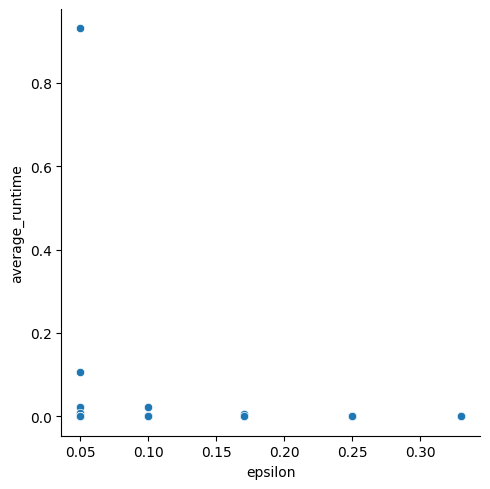

In [3]:
sns.relplot(data=bd_bpt_df, x='epsilon', y='average_runtime')

## Success rate for epsilon-far from bipartite graphs

Text(0.5, 1.0, 'Success rate for epsilon-far from bipartite graphs')

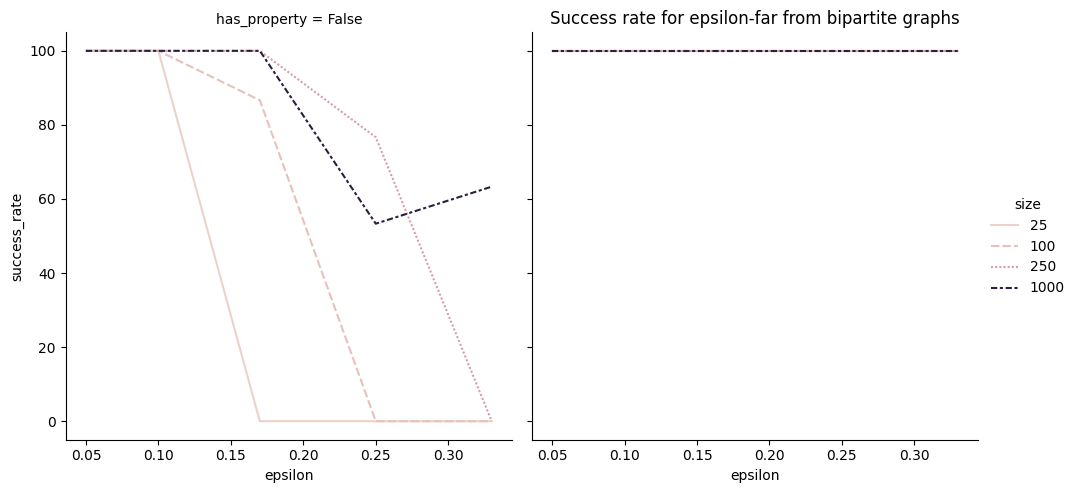

In [4]:
# otherwise use Average runtime (seconds)
srp = sns.relplot(
    data=bd_bpt_df, 
    x='epsilon', 
    y='success_rate', 
    kind='line',
    col='has_property',
    hue='size',
    style='size'
            )

plt.title("Success rate for epsilon-far from bipartite graphs")

# Needs confidence intervals!
# Link for formula: https://sigmazone.com/binomial-confidence-intervals/

## Average runtime graphs - first edition

Text(0.5, 1.0, 'Average runtime for epsilon-far from bipartite graphs')

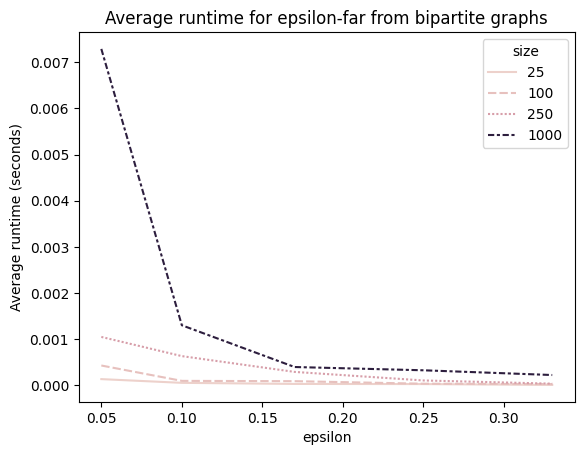

In [5]:
# otherwise use Average runtime (seconds)
e_far_df = bd_bpt_df.query("has_property == False")
e_far_df = e_far_df.rename(columns={"average_runtime":"Average runtime (seconds)"})

rtp = sns.lineplot(
    data=e_far_df, 
    x='epsilon', 
    y='Average runtime (seconds)', 
    hue='size',
    style='size'
    )

plt.title("Average runtime for epsilon-far from bipartite graphs")

## Average runtime with error bars

In [6]:
# trying to add error bars
e_far_df = bd_bpt_df.query("has_property == False")
e_far_df = e_far_df.rename(columns={"size":"Graph Size", "average_runtime":"Average runtime (seconds)"})
e_far_df.head()

,Graph Size,epsilon,Average runtime (seconds),average_runtime_confidence,success_rate,has_property
3,250,0.33,0.000033,0.000001,0.00,False
6,25,0.10,0.000051,0.000010,100.00,False
7,1000,0.33,0.000221,0.000028,63.33,False
11,100,0.33,0.000024,0.000002,0.00,False
12,1000,0.10,0.001299,0.000172,100.00,False


In [7]:
# pick a colour palette
custom_palette = sns.color_palette("coolwarm")
custom_palette.pop(2)
custom_palette.pop(4)
custom_palette = ['#b3cde3', '#8c96c6', '#8856a7', '#810f7c']
custom_palette = ['#a6611a','#dfc27d','#80cdc1','#018571']

Text(0.5, 0, 'Testing epsilon value')

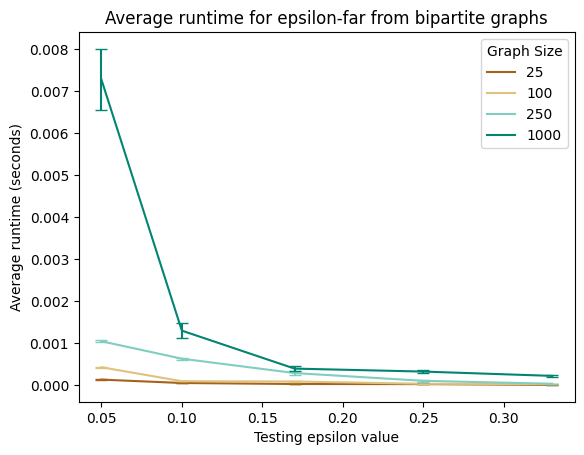

In [8]:
rtp = sns.lineplot(
    data=e_far_df, 
    x='epsilon', 
    y='Average runtime (seconds)', 
    hue='Graph Size',
    palette=custom_palette
    )

sizes = [25, 100, 250, 1000]
for index in range(0, len(sizes)):
    size = sizes[index]
    sized_df = e_far_df.loc[e_far_df["Graph Size"] == size]
    rtp.errorbar(sized_df.epsilon, sized_df["Average runtime (seconds)"], yerr=sized_df.average_runtime_confidence, capsize=4, ls='none', color=custom_palette[index])

plt.title("Average runtime for epsilon-far from bipartite graphs")
plt.xlabel("Testing epsilon value")

In [9]:
# filter data so it has the property, and rename size column to make legend nicer
bpt_df = bd_bpt_df.query("has_property == True")
bpt_df = bpt_df.rename(columns={"size":"Graph Size", "average_runtime":"Average runtime (seconds)"})

Text(0.5, 0, 'Testing epsilon value')

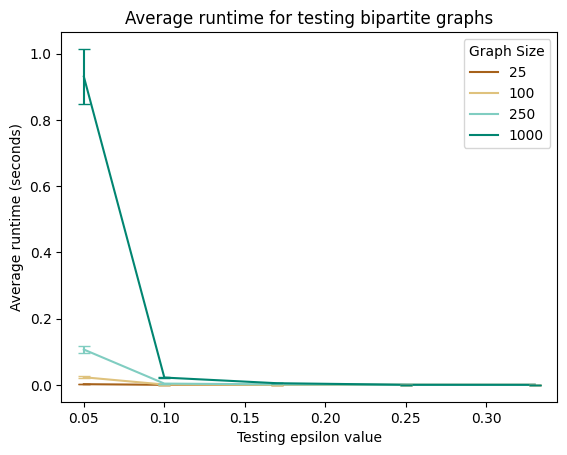

In [10]:
rtp = sns.lineplot(
    data=bpt_df, 
    x='epsilon', 
    y='Average runtime (seconds)', 
    hue='Graph Size',
    palette=custom_palette
    )

sizes = [25, 100, 250, 1000]
for index in range(0, len(sizes)):
    size = sizes[index]
    sized_df = bpt_df.loc[bpt_df["Graph Size"] == size]
    rtp.errorbar(sized_df.epsilon, sized_df["Average runtime (seconds)"], yerr=sized_df.average_runtime_confidence, capsize=4, ls='none', color=custom_palette[index])

plt.title("Average runtime for testing bipartite graphs")
plt.xlabel("Testing epsilon value")

## Function to generate average runtime results graphs

In [4]:
def generate_avg_runtime_graph_from_df(results_df, graph_has_property, graph_title):
    # sort results dataframe so line points are plotted in the correct order
    results_df = results_df.sort_values(["size", "has_property", "epsilon"], ascending=[True, False, True])
    
    # choose colour palette - different for graphs that have property or are e-far
    if graph_has_property:
        colour_palette = ['#a6611a','#dfc27d','#80cdc1','#018571']
    else:
        colour_palette = ['#d7191c','#fdae61','#a6d96a','#1a9641']
    
    # only plot results from graphs that either have or don't have the property
    graph_df = results_df.query(f"has_property == {graph_has_property}")
    graph_df = graph_df.rename(columns={"size": "Graph Size", "average_runtime":"Average runtime (seconds)"})
    
    plot = sns.lineplot(
                data=graph_df, 
                x='epsilon', 
                y='Average runtime (seconds)', 
                hue='Graph Size',
                palette=colour_palette
            )
    
    # draw the error bars for each line
    sizes = graph_df["Graph Size"].unique()
    for index in range(0, len(sizes)):
        size = sizes[index]
        sized_df = graph_df.loc[graph_df["Graph Size"] == size]
        plot.errorbar(sized_df.epsilon, sized_df["Average runtime (seconds)"], yerr=sized_df.average_runtime_confidence, capsize=4, color=colour_palette[index])
        
    plt.title(graph_title)
    plt.xlabel("Testing epsilon value")
    plt.ticklabel_format(style='plain')
    
# colours for having property ['#a6611a','#dfc27d','#80cdc1','#018571']
# colours for epsilon far ['#d7191c','#fdae61','#a6d96a','#1a9641']

## Average runtime of bipartite bounded-degree testing

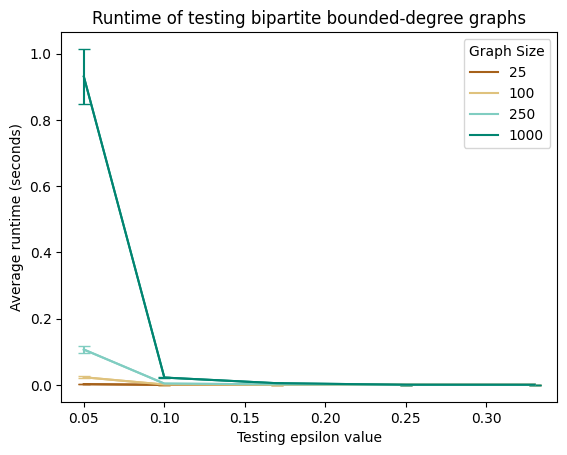

In [12]:
generate_avg_runtime_graph_from_df(bd_bpt_df, True, "Runtime of testing bipartite bounded-degree graphs")

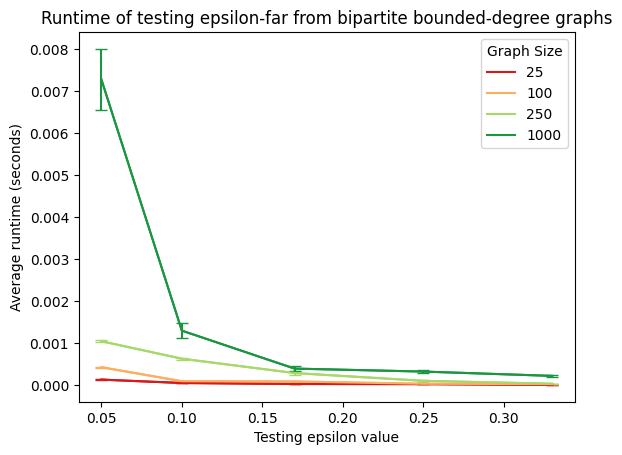

In [13]:
generate_avg_runtime_graph_from_df(bd_bpt_df, False, "Runtime of testing epsilon-far from bipartite bounded-degree graphs")

## Average runtime for bounded-degree K-col testing

In [22]:
bd_kcol_df = pd.read_csv("DissResults/BD_K-col_results.csv")

/tmp/ipykernel_28193/925235302.py:15: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  plot = sns.lineplot(


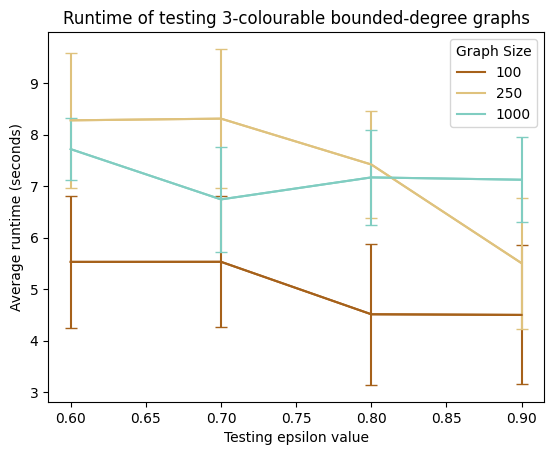

In [16]:
generate_avg_runtime_graph_from_df(bd_kcol_df, True, "Runtime of testing 3-colourable bounded-degree graphs")

In [17]:
def calc_avg_runtime_confidence_lower(row):
    r = row["Average runtime (seconds)"]
    conf = row["average_runtime_confidence"]
    if r - conf < 0:
        return r
    else:
        return conf

def generate_avg_runtime_graph_from_df_kcol(results_df, graph_has_property, graph_title):
    # sort results dataframe so line points are plotted in the correct order
    results_df = results_df.sort_values(["size", "has_property", "epsilon"], ascending=[True, False, True])
    
    # choose colour palette - different for graphs that have property or are e-far
    if graph_has_property:
        colour_palette = ['#a6611a','#dfc27d','#80cdc1','#018571']
    else:
        colour_palette = ['#d7191c','#fdae61','#a6d96a','#1a9641']
    
    # only plot results from graphs that either have or don't have the property
    graph_df = results_df.query(f"has_property == {graph_has_property}")
    graph_df = graph_df.rename(columns={"size": "Graph Size", "average_runtime":"Average runtime (seconds)"})
    
    plot = sns.lineplot(
                data=graph_df, 
                x='epsilon', 
                y='Average runtime (seconds)', 
                hue='Graph Size',
                palette=colour_palette
            )

    graph_df["avgrun_low"] = graph_df.apply(calc_avg_runtime_confidence_lower, axis=1)
    # draw the error bars for each line
    sizes = graph_df["Graph Size"].unique()
    for index in range(0, len(sizes)):
        size = sizes[index]
        sized_df = graph_df.loc[graph_df["Graph Size"] == size]
        plot.errorbar(sized_df.epsilon, sized_df["Average runtime (seconds)"], yerr=(sized_df.avgrun_low, sized_df.average_runtime_confidence), capsize=4, color=colour_palette[index])
        
    plt.title(graph_title)
    plt.xlabel("Testing epsilon value")
    plt.ticklabel_format(style='plain')
    
# colours for having property ['#a6611a','#dfc27d','#80cdc1','#018571']
# colours for epsilon far ['#d7191c','#fdae61','#a6d96a','#1a9641']

/tmp/ipykernel_13704/1305952545.py:23: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  plot = sns.lineplot(


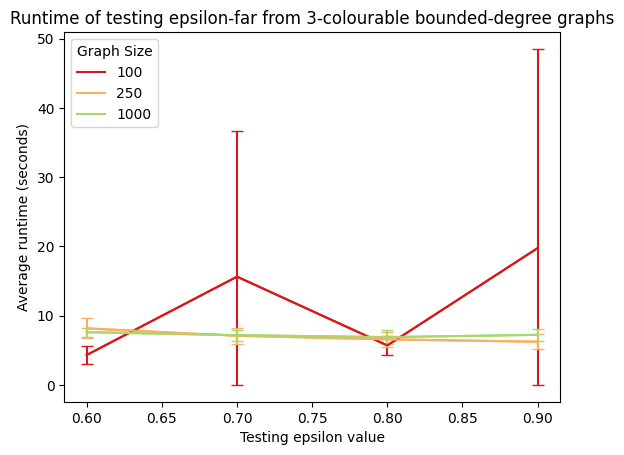

In [18]:
generate_avg_runtime_graph_from_df_kcol(bd_kcol_df, False, "Runtime of testing epsilon-far from 3-colourable bounded-degree graphs")

## Average runtime for dense bipartite testing

Looks like this tester is actually promising!! Decently small error bars and similar runtime for graphs with and without the property

In [3]:
dense_bpt_df = pd.read_csv("DissResults/Dense_BPT_results.csv")

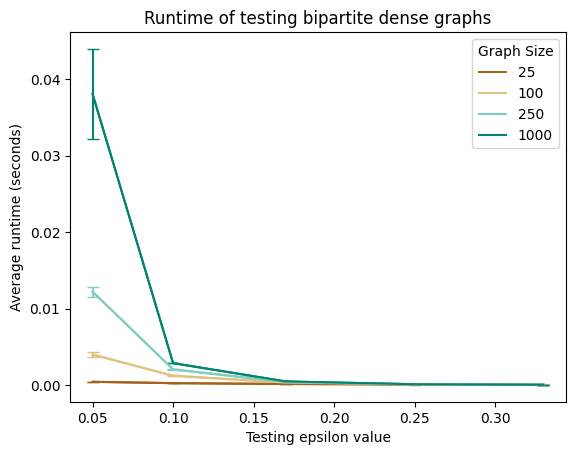

In [19]:
generate_avg_runtime_graph_from_df(dense_bpt_df, True, "Runtime of testing bipartite dense graphs")

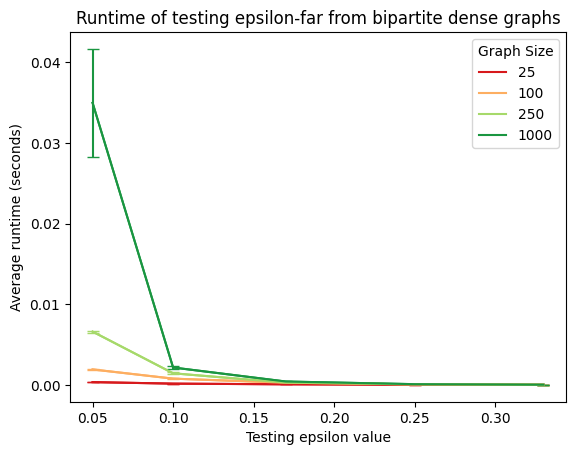

In [20]:
generate_avg_runtime_graph_from_df(dense_bpt_df, False, "Runtime of testing epsilon-far from bipartite dense graphs")

## Average runtime for dense k-col testing

In [23]:
dense_kcol_df = pd.read_csv("DissResults/Dense_K-col_results.csv")

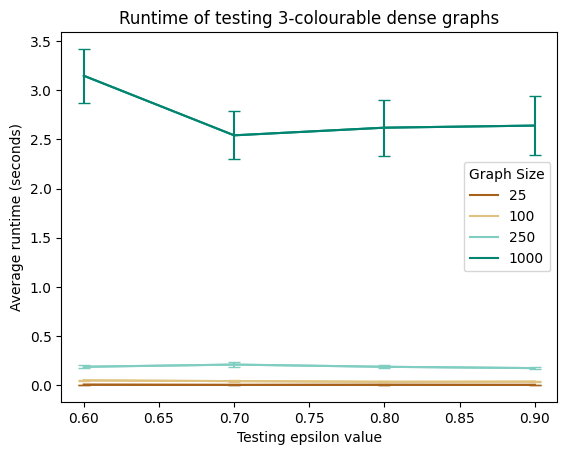

In [24]:
generate_avg_runtime_graph_from_df(dense_kcol_df, True, "Runtime of testing 3-colourable dense graphs")

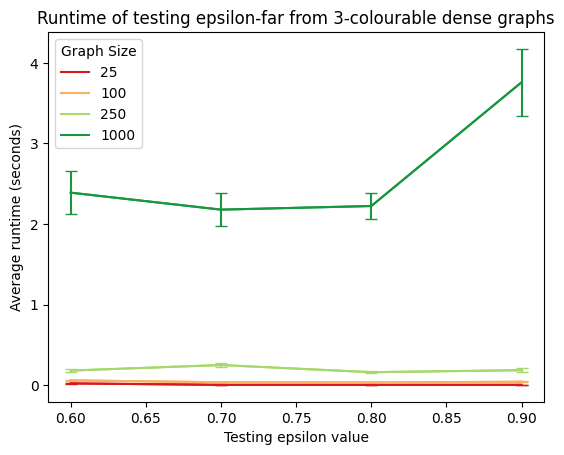

In [23]:
generate_avg_runtime_graph_from_df(dense_kcol_df, False, "Runtime of testing epsilon-far from 3-colourable dense graphs")

## Average runtime for dense degree regularity testing

Very fast tester, will be interesting to compare with success rate

In [7]:
dense_reg_df = pd.read_csv("DissResults/Dense_regular_results.csv")

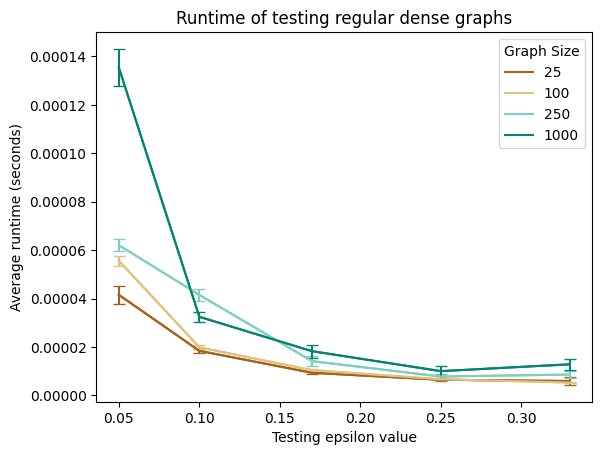

In [28]:
generate_avg_runtime_graph_from_df(dense_reg_df, True, "Runtime of testing regular dense graphs")

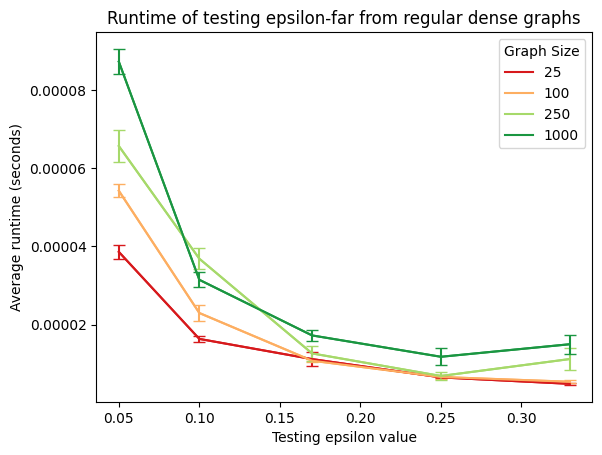

In [8]:
generate_avg_runtime_graph_from_df(dense_reg_df, False, "Runtime of testing epsilon-far from regular dense graphs")

## Average runtime of bounded-degree cycle-freeness testing

In [15]:
bd_acyclic_df = pd.read_csv("DissResults/BD_CycleFreeness_results.csv")

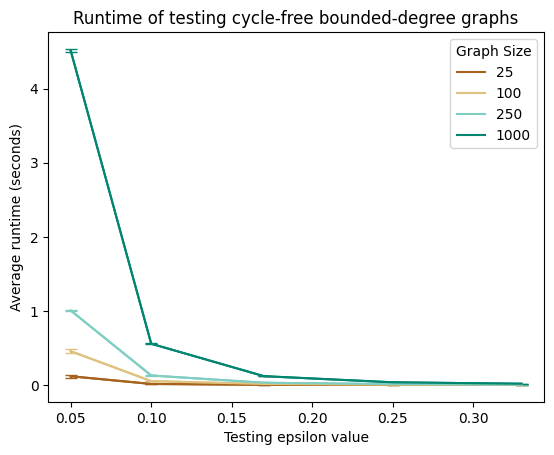

In [13]:
generate_avg_runtime_graph_from_df(bd_acyclic_df, True, "Runtime of testing cycle-free bounded-degree graphs")

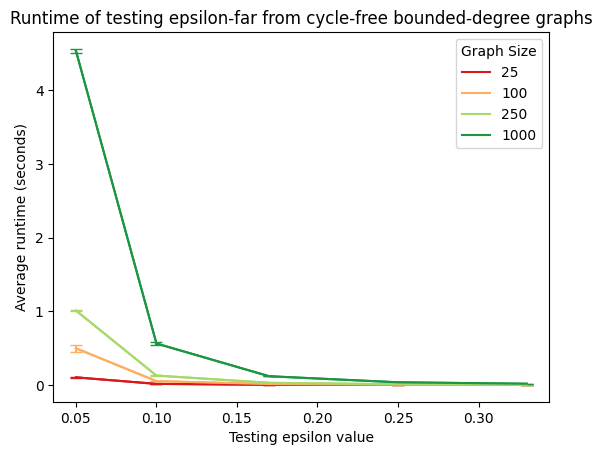

In [14]:
generate_avg_runtime_graph_from_df(bd_acyclic_df, False, "Runtime of testing epsilon-far from cycle-free bounded-degree graphs")

## Average runtime for multiprocess bounded-degree cycle-freeness testing

In [18]:
mp_bd_acyclic_df = pd.read_csv("DissResults/MP_BD_CycleFreeness_results.csv")

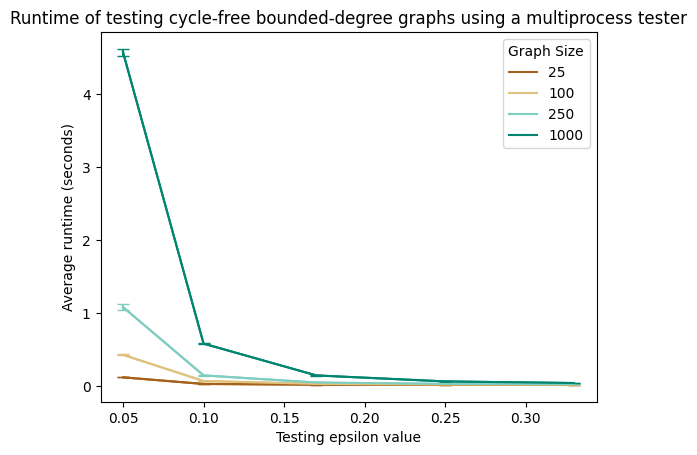

In [7]:
generate_avg_runtime_graph_from_df(mp_bd_acyclic_df, True, "Runtime of testing cycle-free bounded-degree graphs using a multiprocess tester")

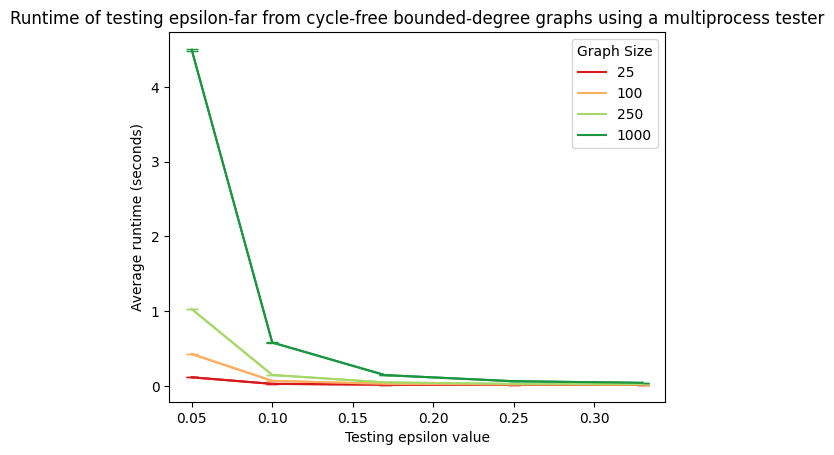

In [8]:
generate_avg_runtime_graph_from_df(mp_bd_acyclic_df, False, "Runtime of testing epsilon-far from cycle-free bounded-degree graphs using a multiprocess tester")

## Average runtime for multiprocess bounded-degree bipartiteness testing

In [23]:
mp_bd_bpt_df = pd.read_csv("DissResults/MP_BD_BPT_results.csv")

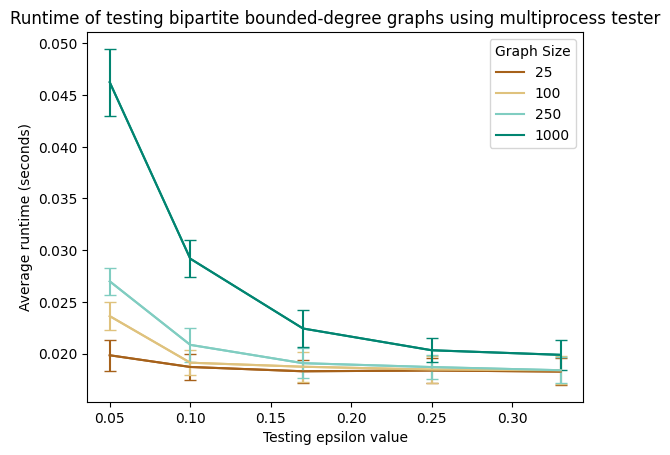

In [31]:
generate_avg_runtime_graph_from_df(mp_bd_bpt_df, True, "Runtime of testing bipartite bounded-degree graphs using multiprocess tester")

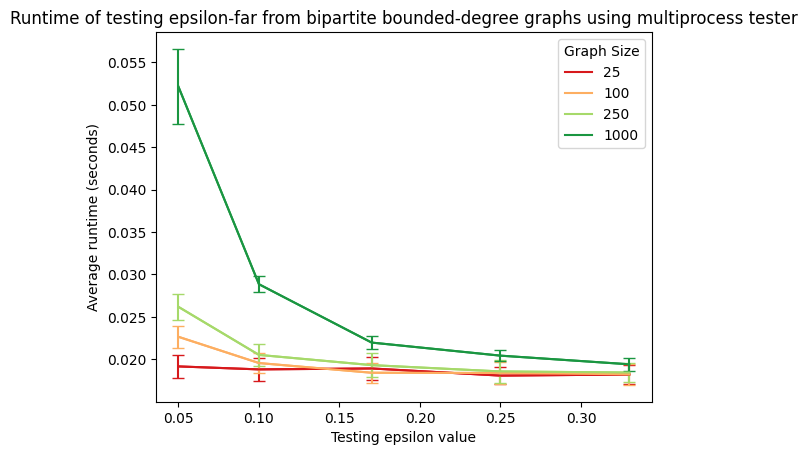

In [32]:
generate_avg_runtime_graph_from_df(mp_bd_bpt_df, False, "Runtime of testing epsilon-far from bipartite bounded-degree graphs using multiprocess tester")

## Success rate graphs

In [7]:
# works for non k-col results, in which the success rate is a percentage based on 30 tests
def calc_binomial_conf_int_lower(success):
    if success == 1 or success == 0:
        return 0
    else:
        low, high = proportion_confint(count = int(success * 30), nobs=30, alpha=0.05, method="wilson")
        
        confidence = (high - low) / 2

        if success - confidence < 0:
            return success
        else:
            return confidence
        
def calc_binomial_conf_int_upper(success):
    if success == 1 or success == 0:
        return 0
    else:
        low, high = proportion_confint(count = int(success * 30), nobs=30, alpha=0.05, method="wilson")
        confidence = (high - low) / 2
        
        if success + confidence > 1:
            return 1 - success
        else:
            return confidence
    
def add_in_binomial_confidence_interval(results_df):
    # changes success rate so it ranges from 0 to 1
    results_df["success_rate"] = results_df["success_rate"] / 100
    # formula for 95% interval: 1.96 * sqrt(p(1-p) / n)
    results_df["success_rate_confidence_lower"] = results_df["success_rate"].apply(calc_binomial_conf_int_lower)
    results_df["success_rate_confidence_upper"] = results_df["success_rate"].apply(calc_binomial_conf_int_upper)
    return results_df

In [10]:
# doesn't work for k-col due to confidence interval calc
def generate_success_rate_graph(results_df, graph_has_property, graph_title):
    # sort results dataframe so line points are plotted in the correct order
    results_df = results_df.sort_values(["size", "has_property", "epsilon"], ascending=[True, False, True])
    
    # choose colour palette - different for graphs that have property or are e-far
    if graph_has_property:
        colour_palette = ['#a6611a','#dfc27d','#80cdc1','#018571']
    else:
        colour_palette = ['#d7191c','#fdae61','#a6d96a','#1a9641']
        
    # add in confidence interval to the results
    results_df = add_in_binomial_confidence_interval(results_df)
    
    # only plot results from graphs that either have or don't have the property
    graph_df = results_df.query(f"has_property == {graph_has_property}")
    graph_df = graph_df.rename(columns={"size": "Graph Size", "success_rate": "Success Rate"})
    
    plot = sns.lineplot(
                data=graph_df, 
                x='epsilon', 
                y='Success Rate', 
                hue='Graph Size',
                palette=colour_palette
            )
    
    # draw the error bars for each line
    sizes = graph_df["Graph Size"].unique()
    for index in range(0, len(sizes)):
        size = sizes[index]
        sized_df = graph_df.loc[graph_df["Graph Size"] == size]
        plot.errorbar(sized_df.epsilon, sized_df["Success Rate"], yerr=(sized_df.success_rate_confidence_lower, sized_df.success_rate_confidence_upper), capsize=4, color=colour_palette[index])
        
    plt.title(graph_title)
    plt.xlabel("Testing epsilon value")
    plt.ticklabel_format(style='plain')

## Bounded-degree bipartite success rate

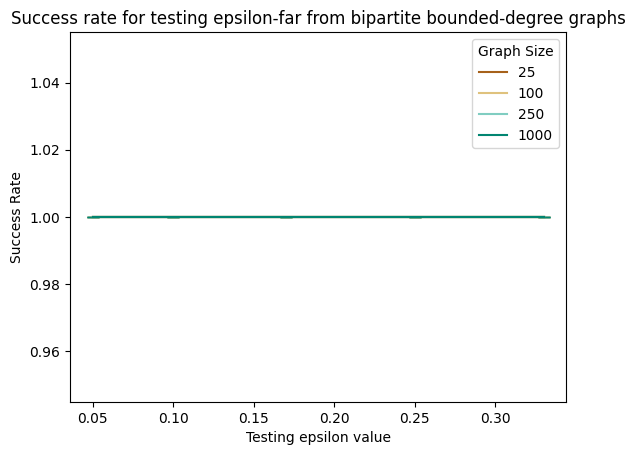

In [15]:
generate_success_rate_graph(bd_bpt_df, True, "Success rate for testing epsilon-far from bipartite bounded-degree graphs")

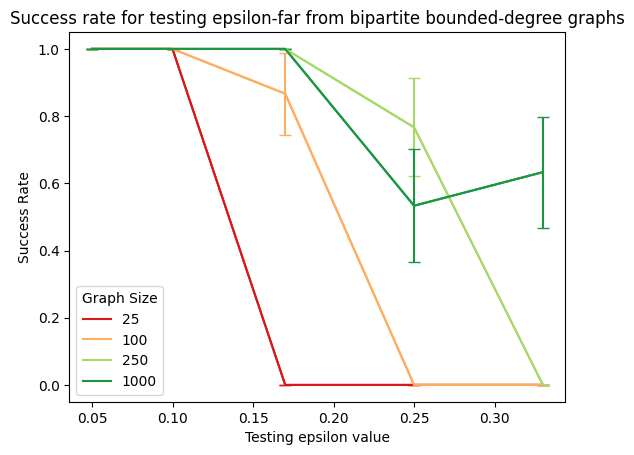

In [35]:
generate_success_rate_graph(bd_bpt_df, False, "Success rate for testing epsilon-far from bipartite bounded-degree graphs")

## Dense bipartite success rate

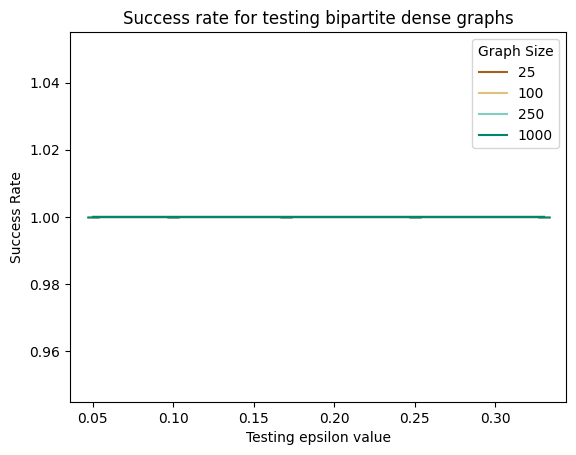

In [6]:
generate_success_rate_graph(dense_bpt_df, True, "Success rate for testing bipartite dense graphs")

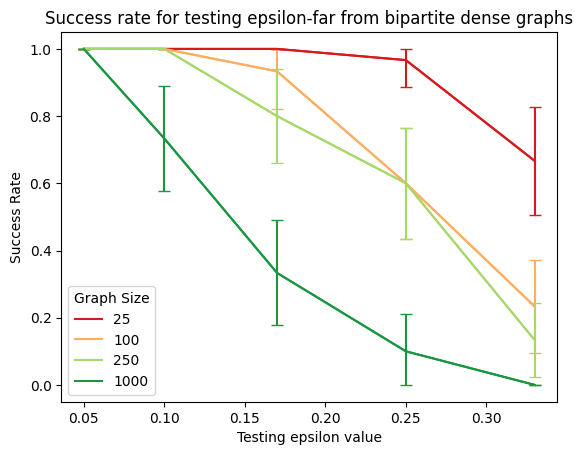

In [36]:
generate_success_rate_graph(dense_bpt_df, False, "Success rate for testing epsilon-far from bipartite dense graphs")

## Dense k-col success rate

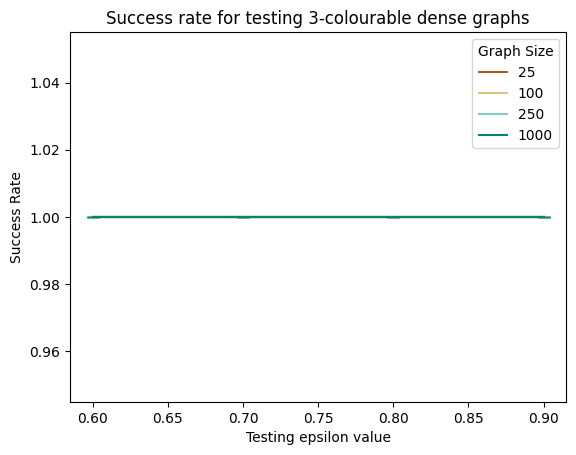

In [25]:
generate_success_rate_graph(dense_kcol_df, True, "Success rate for testing 3-colourable dense graphs")

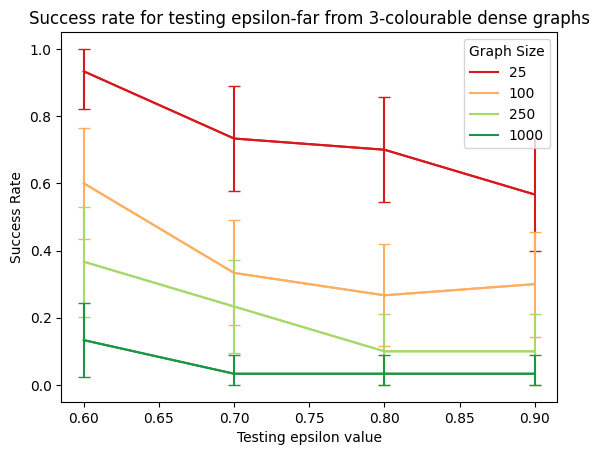

In [37]:
generate_success_rate_graph(dense_kcol_df, False, "Success rate for testing epsilon-far from 3-colourable dense graphs")

## Dense regularity success rate

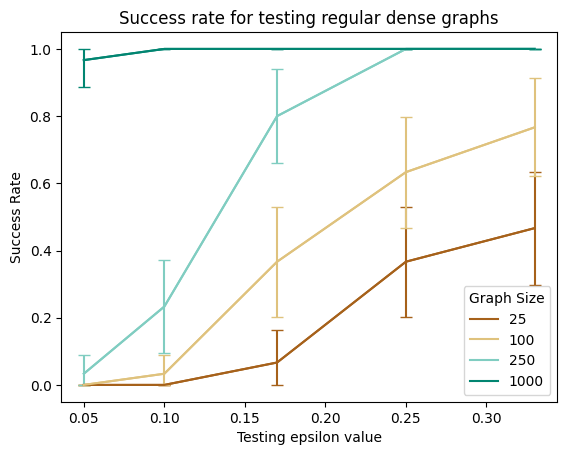

In [38]:
generate_success_rate_graph(dense_reg_df, True, "Success rate for testing regular dense graphs")

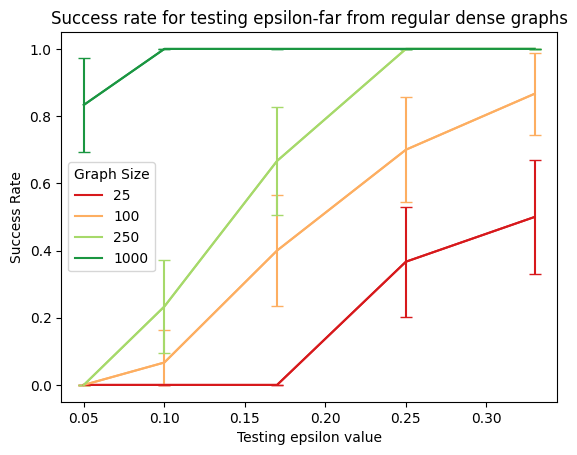

In [40]:
generate_success_rate_graph(dense_reg_df, False, "Success rate for testing epsilon-far from regular dense graphs")

## Bounded-degree k-col success rate

/tmp/ipykernel_13704/1784643048.py:19: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  plot = sns.lineplot(


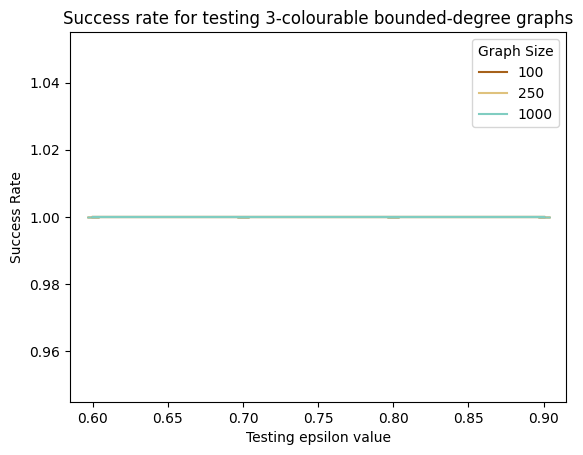

In [28]:
generate_success_rate_graph(bd_kcol_df, True, "Success rate for testing 3-colourable bounded-degree graphs")

/tmp/ipykernel_13704/1784643048.py:19: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  plot = sns.lineplot(


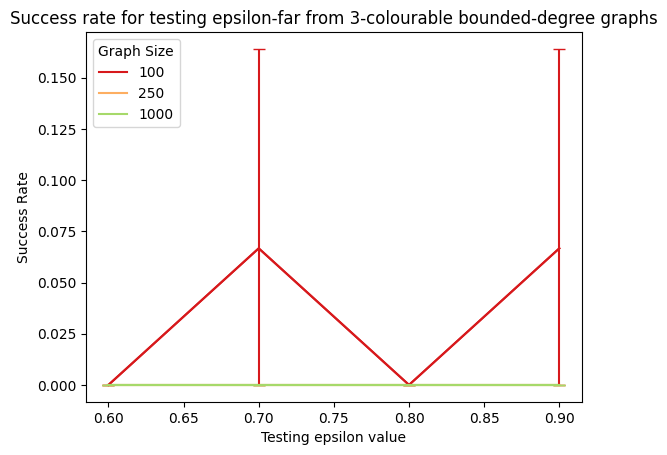

In [29]:
generate_success_rate_graph(bd_kcol_df, False, "Success rate for testing epsilon-far from 3-colourable bounded-degree graphs")

## Bounded-degree cycle-freeness success rate

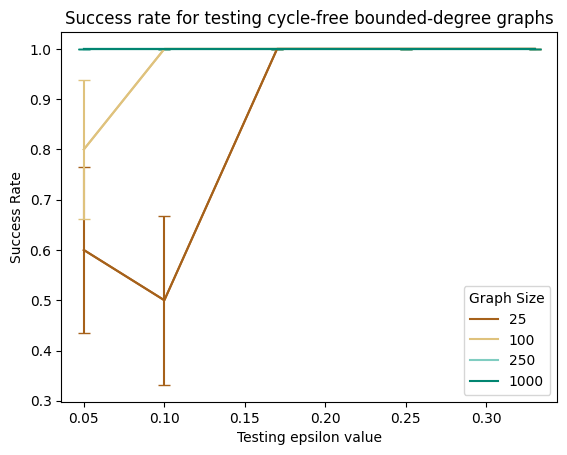

In [16]:
generate_success_rate_graph(bd_acyclic_df, True, "Success rate for testing cycle-free bounded-degree graphs")

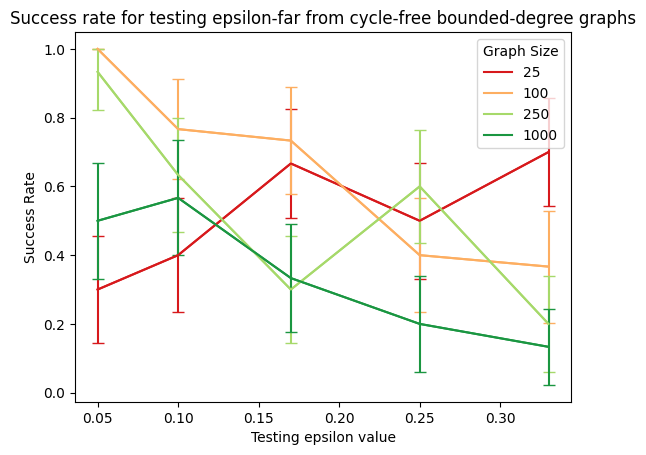

In [17]:
generate_success_rate_graph(bd_acyclic_df, False, "Success rate for testing epsilon-far from cycle-free bounded-degree graphs")

## Multiprocess Bounded-degree cycle-freeness success rate

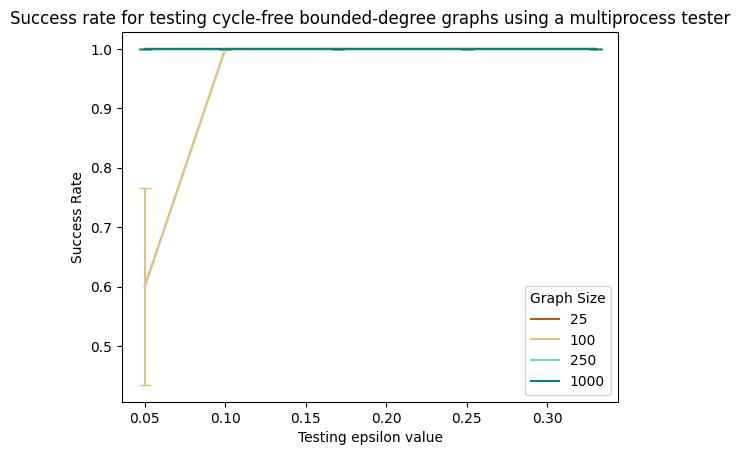

In [19]:
generate_success_rate_graph(mp_bd_acyclic_df, True, "Success rate for testing cycle-free bounded-degree graphs using a multiprocess tester")

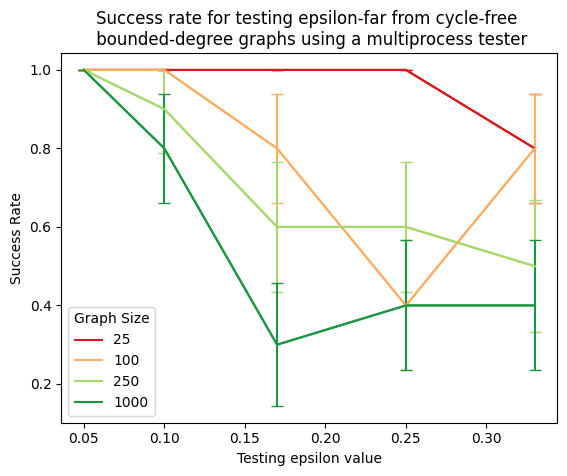

In [22]:
generate_success_rate_graph(mp_bd_acyclic_df, False, "Success rate for testing epsilon-far from cycle-free \n bounded-degree graphs using a multiprocess tester")

## Multiprocess Bounded-degree bipartiteness success rate

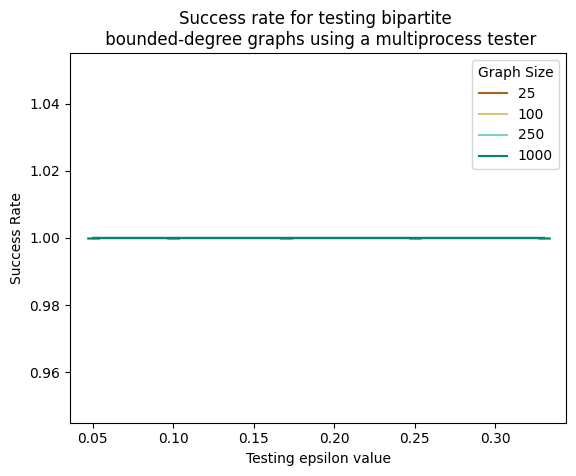

In [27]:
generate_success_rate_graph(mp_bd_bpt_df, True, "Success rate for testing bipartite \n bounded-degree graphs using a multiprocess tester")

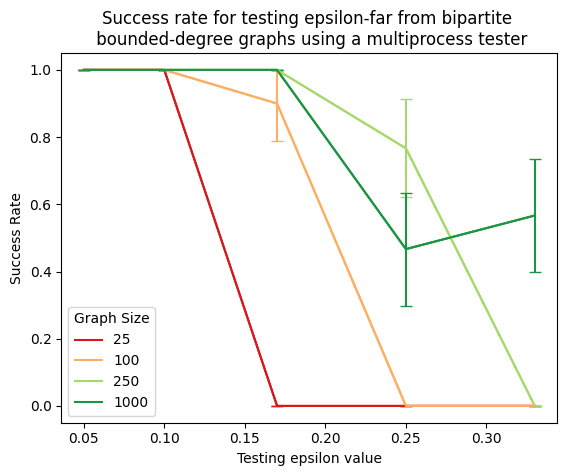

In [28]:
generate_success_rate_graph(mp_bd_bpt_df, False, "Success rate for testing epsilon-far from bipartite \n bounded-degree graphs using a multiprocess tester")

## Average runtime expander tester

In [12]:
def generate_avg_runtime_expander_graph(graph_df, graph_title):
    # sort results dataframe so line points are plotted in the correct order
    graph_df = graph_df.sort_values(["alpha", "epsilon"], ascending=[True, True])
    graph_df["alpha"] = round(graph_df["alpha"], 2)
    
    # choose colour palette - different for graphs that have property or are e-far
    colour_palette = ['#a6611a','#dfc27d','#80cdc1','#018571']
    
    # only plot results from graphs that either have or don't have the property
    graph_df = graph_df.rename(columns={"alpha": "Alpha", "average_runtime":"Average runtime (seconds)"})
    
    plot = sns.lineplot(
                data=graph_df, 
                x='epsilon', 
                y='Average runtime (seconds)', 
                hue='Alpha',
                palette=colour_palette
            )
    
    # draw the error bars for each line
    alphas = graph_df["Alpha"].unique()
    for index in range(0, len(alphas)):
        alpha = alphas[index]
        alpha_df = graph_df.loc[graph_df["Alpha"] == alpha]
        plot.errorbar(alpha_df.epsilon, alpha_df["Average runtime (seconds)"], yerr=alpha_df.average_runtime_confidence, capsize=4, color=colour_palette[index])
        
    plt.title(graph_title)
    plt.xlabel("Testing epsilon value")
    plt.ticklabel_format(style='plain')
    
# colours for having property ['#a6611a','#dfc27d','#80cdc1','#018571']
# colours for epsilon far ['#d7191c','#fdae61','#a6d96a','#1a9641']

In [4]:
expander_df = pd.read_csv("DissResults/Expander_results.csv")

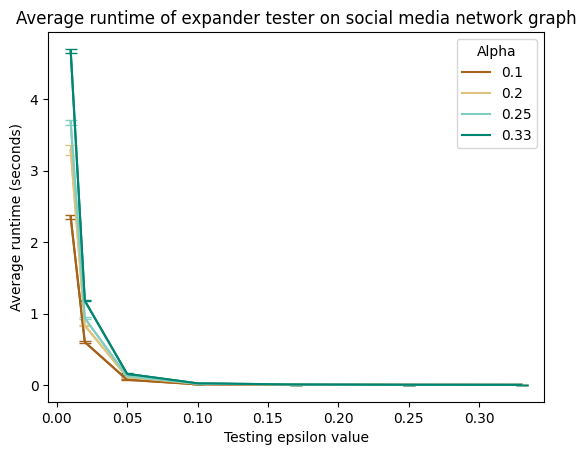

In [13]:
generate_avg_runtime_expander_graph(expander_df, "Average runtime of expander tester on social media network graph")

## Success rate expander tester

In [9]:
# doesn't work for k-col due to confidence interval calc
def generate_success_rate_expander_graph(results_df, graph_title):
    # sort results dataframe so line points are plotted in the correct order
    results_df = results_df.sort_values(["alpha", "epsilon"], ascending=[True, True])

    colour_palette = ['#a6611a','#dfc27d','#80cdc1','#018571']
        
    # add in confidence interval to the results
    results_df = add_in_binomial_confidence_interval(results_df)
    
    # only plot results from graphs that either have or don't have the property
    graph_df = results_df
    graph_df["alpha"] = round(graph_df["alpha"], 2)
    graph_df = graph_df.rename(columns={"alpha": "Alpha", "success_rate": "Success Rate"})
    
    plot = sns.lineplot(
                data=graph_df, 
                x='epsilon', 
                y='Success Rate', 
                hue='Alpha',
                palette=colour_palette
            )
    
    # draw the error bars for each line
    alphas = graph_df["Alpha"].unique()
    for index in range(0, len(alphas)):
        alpha = alphas[index]
        alpha_df = graph_df.loc[graph_df["Alpha"] == alpha]
        plot.errorbar(alpha_df.epsilon, alpha_df["Success Rate"], yerr=(alpha_df.success_rate_confidence_lower, alpha_df.success_rate_confidence_upper), capsize=4, color=colour_palette[index])
        
    plt.title(graph_title)
    plt.xlabel("Testing epsilon value")
    plt.ticklabel_format(style='plain')

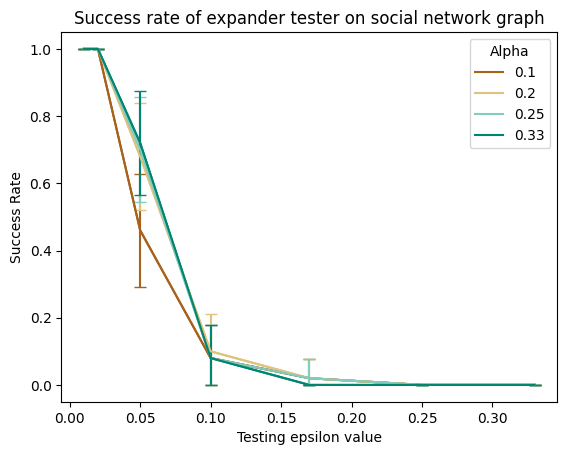

In [10]:
generate_success_rate_expander_graph(expander_df, "Success rate of expander tester on social network graph")